In [9]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("wyattowalsh/basketball")


# Dataset Summary

## The dataset contains comprehensive NBA game-level statistics from 1946 to present

## Their is multiple rows and 55 columns for season.

## I predict that Home court advantage has a clear effect on all stats, boosting them all overall. This dataset is perfect for this and includes everything including home court +- and away +-

## Source: Kaggle dataset "wyattowalsh/basketball"

## Method: Kaggle API integration via kagglehub Python library

## Access: Direct download from authenticated Kaggle repository

## Format: Multiple CSV files with SQLite backup

In [10]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [12]:
print("Files in the dataset:")
for file in os.listdir(path):
    print(f" - {file}")

# If there are subdirectories, explore those too
for root, dirs, files in os.walk(path):
    for file in files:
        print(f" - {os.path.join(root, file)}")

Files in the dataset:
 - nba.sqlite
 - csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/nba.sqlite
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/play_by_play.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_info.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/player.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team_history.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team_info_common.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/inactive_players.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/other_stats.csv
 - /Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/

In [ ]:
# Load multiple CSV files into a dictionary
csv_files = {
    'players': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/player.csv',
    'common_player_info': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/common_player_info.csv',
    'games': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game.csv',
    'play_by_play': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/play_by_play.csv',
    'game_summary': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_summary.csv',
    'teams': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team.csv',
    'draft_history': '/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/draft_history.csv'
}

# Load all datasets
datasets = {}
for name, file_path in csv_files.items():
    try:
        datasets[name] = pd.read_csv(file_path)
        print(f"✅ Loaded {name}: {datasets[name].shape}")
    except Exception as e:
        print(f" Failed to load {name}: {e}")

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game.csv')
teams = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/team.csv')
line_score = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/line_score.csv')
game_summary = pd.read_csv('/Users/dylandoyle-rowan/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/csv/game_summary.csv')

print("Datasets loaded:")
print(f"Games: {games.shape}")
print(f"Teams: {teams.shape}")
print(f"Line Scores: {line_score.shape}")
print(f"Game Summary: {game_summary.shape}")

In [ ]:
print("GAMES DATA COLUMNS:")
print(games.columns.tolist())
print("\nGAMES DATA SAMPLE:")
display(games.head(3))

print("\nChecking for home/away columns:")
for col in games.columns:
    if 'home' in col.lower() or 'away' in col.lower() or 'visitor' in col.lower():
        print(f" - {col}")

# Analysis Plan
## I plan on starting with simple win percentage differences in home v away games, and then going into more advanced statistices such as defensive efficiency, shooting percentages, and more!

=== HOME vs AWAY WIN RATES ===
Home teams win: 61.9% of games
Away teams win: 38.1% of games
Home advantage: 23.7%


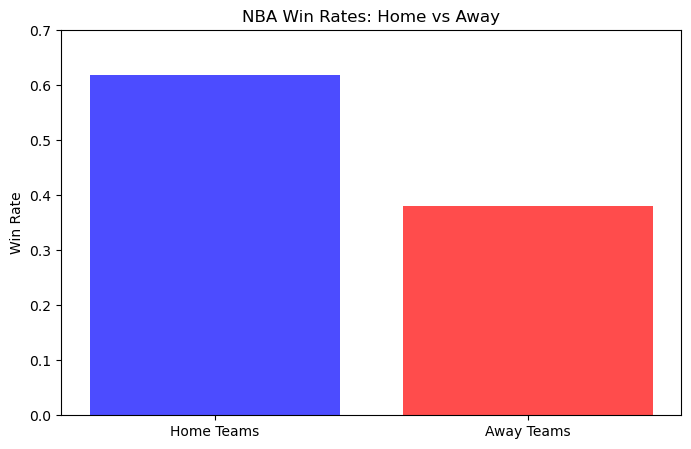

In [35]:
# Calculate basic win rates
home_wins = (games['wl_home'] == 'W').sum()
away_wins = (games['wl_away'] == 'W').sum()
total_games = len(games)

home_win_rate = home_wins / total_games
away_win_rate = away_wins / total_games

print("=== HOME vs AWAY WIN RATES ===")
print(f"Home teams win: {home_win_rate:.1%} of games")
print(f"Away teams win: {away_win_rate:.1%} of games")
print(f"Home advantage: {home_win_rate - away_win_rate:.1%}")

# Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.bar(['Home Teams', 'Away Teams'], [home_win_rate, away_win_rate], 
               color=['blue', 'red'], alpha=0.7)


plt.title('NBA Win Rates: Home vs Away')
plt.ylabel('Win Rate')
plt.ylim(0, 0.7)
plt.show()


OffensiveState


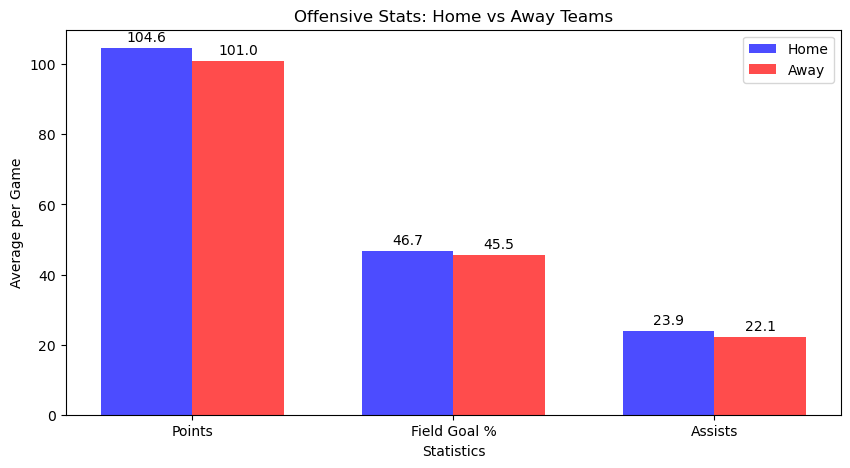

Home teams score 104.6 points per game
Away teams score 101.0 points per game
Home teams shoot 46.7% FG
Away teams shoot 45.5% FG


In [36]:
print("\nOffensiveState")

# 3 Key offensive Stats
offensive_stats = ['Points', 'Field Goal %', 'Assists']
home_values = [
    games['pts_home'].mean(),
    games['fg_pct_home'].mean() * 100,  # Convert to percentage
    games['ast_home'].mean()
]
away_values = [
    games['pts_away'].mean(),
    games['fg_pct_away'].mean() * 100,
    games['ast_away'].mean()
]

#Plot
plt.figure(figsize=(10, 5))
x_pos = range(len(offensive_stats))
width = 0.35

plt.bar([x - width/2 for x in x_pos], home_values, width, label='Home', color='blue', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], away_values, width, label='Away', color='red', alpha=0.7)

plt.xlabel('Statistics')
plt.ylabel('Average per Game')
plt.title('Offensive Stats: Home vs Away Teams')
plt.xticks(x_pos, offensive_stats)
plt.legend()

# Add value labels
for i, (h, a) in enumerate(zip(home_values, away_values)):
    plt.text(i - width/2, h + 1, f'{h:.1f}', ha='center', va='bottom')
    plt.text(i + width/2, a + 1, f'{a:.1f}', ha='center', va='bottom')

plt.show()

# Print the numbers
print(f"Home teams score {home_values[0]:.1f} points per game")
print(f"Away teams score {away_values[0]:.1f} points per game")
print(f"Home teams shoot {home_values[1]:.1f}% FG")
print(f"Away teams shoot {away_values[1]:.1f}% FG")

## Same Thing for Defensive Stats now. 


DefensiveStats


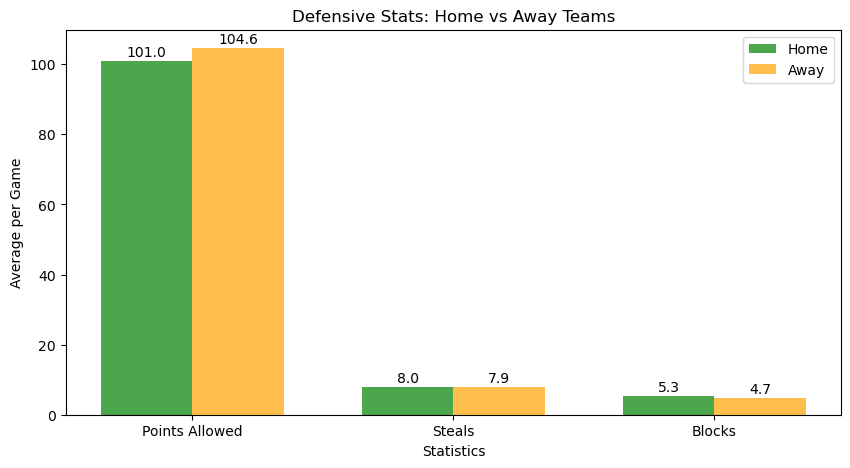

Home teams allow 101.0 points per game
Away teams allow 104.6 points per game
Home teams get 8.0 steals per game
Away teams get 7.9 steals per game


In [37]:
print("\nDefensiveStats")

# 3 Important defensive stats
defensive_stats = ['Points Allowed', 'Steals', 'Blocks']
home_defense = [
    games['pts_away'].mean(),  
    games['stl_home'].mean(),
    games['blk_home'].mean()
]
away_defense = [
    games['pts_home'].mean(), 
    games['stl_away'].mean(),
    games['blk_away'].mean()
]

# Plot
plt.figure(figsize=(10, 5))
x_pos = range(len(defensive_stats))
width = 0.35

plt.bar([x - width/2 for x in x_pos], home_defense, width, label='Home', color='green', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], away_defense, width, label='Away', color='orange', alpha=0.7)

plt.xlabel('Statistics')
plt.ylabel('Average per Game')
plt.title('Defensive Stats: Home vs Away Teams')
plt.xticks(x_pos, defensive_stats)
plt.legend()

# Adding Labels
for i, (h, a) in enumerate(zip(home_defense, away_defense)):
    plt.text(i - width/2, h + 0.5, f'{h:.1f}', ha='center', va='bottom')
    plt.text(i + width/2, a + 0.5, f'{a:.1f}', ha='center', va='bottom')

plt.show()


print(f"Home teams allow {home_defense[0]:.1f} points per game")
print(f"Away teams allow {away_defense[0]:.1f} points per game")
print(f"Home teams get {home_defense[1]:.1f} steals per game")
print(f"Away teams get {away_defense[1]:.1f} steals per game")

## In the future I plan on going more into detail, these were just quick summarys for this checkpoint